# 🌪️ Which news outlets are giving climate change the most coverage?

This data set contains over 142,000 articles from 15 sources mostly from 2016 and 2017.

One of the things that might be interesting to look at is the correlation, if any, between the characteristics of these news outlets and the proportion of climate-change-related articles they publish.  We might hypothesize that right-leaning **Breitbart**, for example, would have a lower proportion of climate related articles than, say, **NPR**. [Source](https://www.dataquest.io/blog/tutorial-text-analysis-python-test-hypothesis/)

In [ ]:
# Data source https://www.kaggle.com/snapcrack/all-the-news
# extract to directory kaggle which should be sibling to your current directory

In [1]:
# HOWTO create a folder if it does not exist
# create directory kaggle if it does not exist
from pathlib import Path # regular Python library
# we want to create a directory kaggle in the parent directory of the current directory
Path("../kaggle").mkdir(parents=True, exist_ok=True)
# check if the directory exists
print("Path exists", Path("../kaggle").exists())

Path exists True


In [2]:
# %matplotlib inline
import pandas as pd  # main dataframe library
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string # built in Python library
import re # built in Python library for regular expressions
from collections import Counter
from nltk.corpus import stopwords # possiblye nltk might need installing,everything else is standard on Anaconda

# again if you do not have some library you install them with pip install library_name
# or from Jupyter notebook with !pip install library_name as the first line in a cell

In [3]:
import csv #i do not necessarily need this library since Pandas can read csv files
# sometimes it might be useful to have it because the advantage of csv library is that it can read line by line
# also it is built in Python library no need to install it

In [4]:
# pt1 = pd.read_csv('kaggle/articles1.csv', index_col=0, encoding="utf-8",nrows=10000)
pt1 = pd.read_csv('../kaggle/articles1.csv', index_col=0, encoding="utf-8")
pt1.head()

,id,title,publication,author,date,year,month,url,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [5]:
# overview of the data
pt1.shape

(50000, 9)

In [6]:
# let's get info about the data
pt1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 53291
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           50000 non-null  int64  
 1   title        50000 non-null  object 
 2   publication  50000 non-null  object 
 3   author       43694 non-null  object 
 4   date         50000 non-null  object 
 5   year         50000 non-null  float64
 6   month        50000 non-null  float64
 7   url          0 non-null      float64
 8   content      50000 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 3.8+ MB


In [ ]:
# so object in Panda means a string of some length

In [7]:
# so .. means to go up one directory
# we do this because kaggle is a sibling of the current directory
# we are in analysis folder
pt2 = pd.read_csv('../kaggle/articles2.csv', index_col=0, encoding="utf-8")
pt2.head()

,id,title,publication,author,date,year,month,url,content
53293,73471,Patriots Day Is Best When It Digs Past the Her...,Atlantic,David Sims,2017-01-11,2017.0,1.0,NaN,"Patriots Day, Peter Berg’s new thriller that r..."
53294,73472,A Break in the Search for the Origin of Comple...,Atlantic,Ed Yong,2017-01-11,2017.0,1.0,NaN,"In Norse mythology, humans and our world were ..."
53295,73474,Obama’s Ingenious Mention of Atticus Finch,Atlantic,Spencer Kornhaber,2017-01-11,2017.0,1.0,NaN,“If our democracy is to work in this increasin...
53296,73475,"Donald Trump Meets, and Assails, the Press",Atlantic,David A. Graham,2017-01-11,2017.0,1.0,NaN,Updated on January 11 at 5:05 p. m. In his fir...
53297,73476,Trump: ’I Think’ Hacking Was Russian,Atlantic,Kaveh Waddell,2017-01-11,2017.0,1.0,NaN,Updated at 12:25 p. m. After months of equivoc...


In [8]:
pt3 = pd.read_csv('../kaggle/articles3.csv', index_col=0, encoding="utf-8")
pt3.head()

,id,title,publication,author,date,year,month,url,content
103459,151908,Alton Sterling’s son: ’Everyone needs to prote...,Guardian,Jessica Glenza,2016-07-13,2016.0,7.0,https://www.theguardian.com/us-news/2016/jul/1...,The son of a Louisiana man whose father was sh...
103460,151909,Shakespeare’s first four folios sell at auctio...,Guardian,NaN,2016-05-25,2016.0,5.0,https://www.theguardian.com/culture/2016/may/2...,Copies of William Shakespeare’s first four boo...
103461,151910,My grandmother’s death saved me from a life of...,Guardian,Robert Pendry,2016-10-31,2016.0,10.0,https://www.theguardian.com/commentisfree/2016...,"Debt: $20, 000, Source: College, credit cards,..."
103462,151911,I feared my life lacked meaning. Cancer pushed...,Guardian,Bradford Frost,2016-11-26,2016.0,11.0,https://www.theguardian.com/commentisfree/2016...,"It was late. I was drunk, nearing my 35th birt..."
103463,151912,Texas man serving life sentence innocent of do...,Guardian,NaN,2016-08-20,2016.0,8.0,https://www.theguardian.com/us-news/2016/aug/2...,A central Texas man serving a life sentence fo...


In [ ]:
# let's check if the columns are the same in all three dataframes
print(f"Are columns all the same in all three dataframes? {pt1.columns.all() == pt2.columns.all() == pt3.columns.all()}")
# columsn are:
print(pt1.columns)
# you could also conver the columns to sets and check if the sets are the same
assert set(pt1.columns) == set(pt2.columns) == set(pt3.columns), "Columns are not the same in all three dataframes"
# assertion will raise an error if the condition is not met
# if the condition is met, the code will continue to run and no message will be printed
# some assertion are good to put in code periodically to check if the code is running as expected

Are columns all the same in all three dataframes? True
Index(['id', 'title', 'publication', 'author', 'date', 'year', 'month', 'url',
       'content'],
      dtype='object')


In [14]:
# now we are going to combine the 3 dataframes into one big dataframe
# we already read the data
# pt1 = pd.read_csv('../kaggle/articles1.csv', index_col=0)
# pt2 = pd.read_csv('../kaggle/articles2.csv', index_col=0)
# pt3 = pd.read_csv('../kaggle/articles3.csv', index_col=0)

# we create a list of the dataframes
list_of_dataframes = [pt1,pt2,pt3]
# then we concatenate them
articles = pd.concat(list_of_dataframes) # so adding all 3 into one big dataframe with concatation
# concat requires a list of dataframes with the same columns
# there are other methods to combine dataframes
# such as merge, join, append
# documentation https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

# articles = pd.concat([pt1,pt2,pt3]) # so adding all 3 into one big dataframe with concatation
print(f"Dataset contains {len(articles)} articles written between {int(articles['year'].min())} and {int(articles['year'].max())}")
print(f"\nList of publications includes: {articles.publication.unique().tolist()}")

Dataset contains 142570 articles written between 2000 and 2017

List of publications includes: ['New York Times', 'Breitbart', 'CNN', 'Business Insider', 'Atlantic', 'Fox News', 'Talking Points Memo', 'Buzzfeed News', 'National Review', 'New York Post', 'Guardian', 'NPR', 'Reuters', 'Vox', 'Washington Post']


## Filtering needed files and concatenating them into single dataframe

In [4]:
# before we proceed I will show you how you could have gotten a list of all .csv files matching specific pattern
# so we are interested in files that start with articles are followed by one or more digits and end with .csv
# we can use regular expressions to match the pattern
# we already imported re library
# we will use list comprehension to get the list of files
# we will use Path library to get the list of files
# we will use the glob method to get the list of files

# our path is ../kaggle
# we will use Path to get the list of files

folder = Path("../kaggle") # kaggle is sibling folder to our current notebook folder
files = [file for file in folder.glob("articles[0-9]*.csv")]
# so we used glob to specify the pattern # glob is built into Path library
# alternative is to use rglob which is recursive glob so it will go through all subfolders
# we used list comprehension to get the list of files
print(files)
# note WindowsPath in results on Windows machines
# if you are on a Mac or Linux you will see PosixPath but idea is the same
# Path is OS neutral way to work with files and folders

[WindowsPath('../kaggle/articles1.csv'), WindowsPath('../kaggle/articles2.csv'), WindowsPath('../kaggle/articles3.csv')]


In [5]:
# now that we have a list of files we could load them all together and then concatenate them
# so this recipe would work on any number of files

df_list = []
for file in files:
    df = pd.read_csv(file, index_col=0)
    df_list.append(df)
# here you would insert assertion that all columns are the same in all dataframes
articles = pd.concat(df_list)
# shape
print(articles.shape)
print(f"Dataset contains {len(articles)} articles written between {int(articles['year'].min())} and {int(articles['year'].max())}")

(142570, 9)
Dataset contains 142570 articles written between 2000 and 2017


## Deleting unused dataframes

We do not need pt1,pt2, pt3

Also we do not need the partials in df_list

In [17]:
# so let's delete pt1, pt2, pt3 and df_list
del pt1, pt2, pt3, df_list
# Python will automatically delete the variables when the cell is run again
# and memory will be freed, if no other variable is pointing to the same memory location

In [18]:
# let's delete df
del df

In [19]:
# how about list_of_dataframes
del list_of_dataframes

## Yearly Distribution of Articles

In [20]:
# lets find distribution of articles by year
# we can use value_counts
articles['year'].value_counts()
# value counts generates a frequency table for some column

year
2016.0    85405
2017.0    50404
2015.0     3705
2013.0      228
2014.0      125
2012.0       34
2011.0        8
2010.0        6
2008.0        3
2009.0        3
2004.0        2
2003.0        2
2005.0        2
2007.0        1
2000.0        1
Name: count, dtype: int64

<Axes: xlabel='year'>

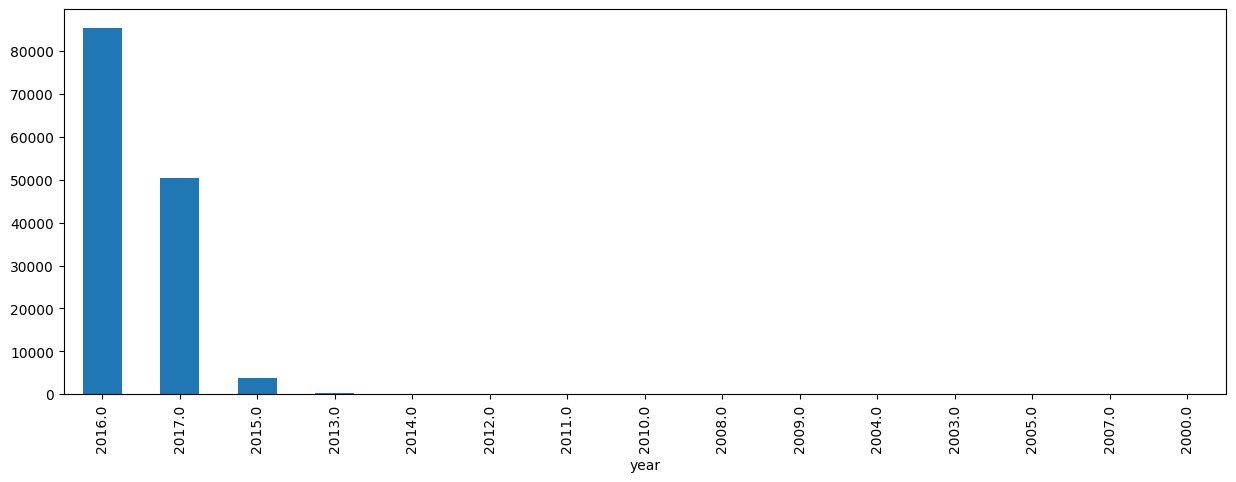

In [6]:
# lets plot the distribution of articles by year
# we can use value_counts
# pandas offers a plot method
articles['year'].value_counts().plot(kind='bar',figsize=(15,5))
# you can change the plotting library to seaborn or matplotlib or plotly 
# default is matplotlib

<Axes: xlabel='year'>

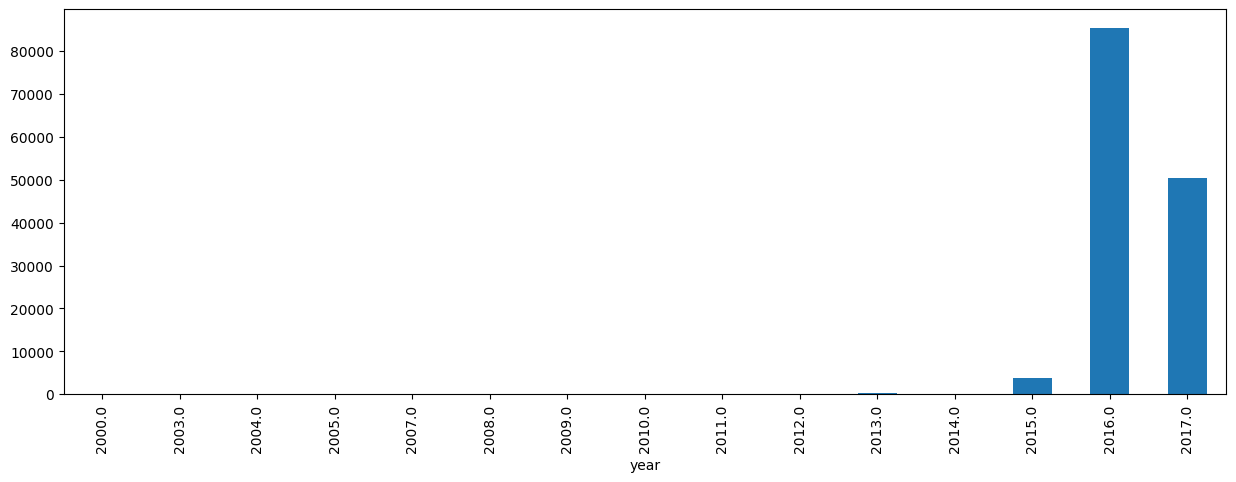

In [7]:
# let's do the same plot but in order of years
articles['year'].value_counts().sort_index().plot(kind='bar',figsize=(15,5))

In [8]:
# how about a seaborn version of same plot
# sns.countplot(articles['year']) # looks like countplot does not work with pandas series

<Axes: xlabel='publication'>

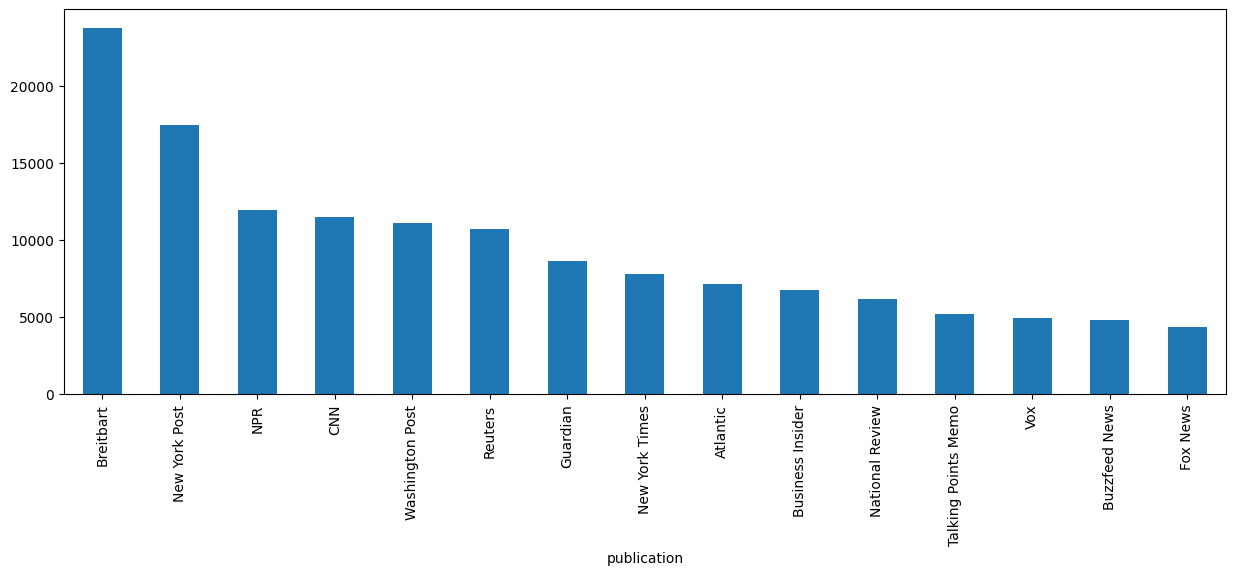

In [9]:
# how about the distribution of articles by publication
# we can use value_counts
# pandas offers a plot method
articles['publication'].value_counts().plot(kind='bar',figsize=(15,5))
# value_counts() returns a series
# we can plot a series with the plot method
# series is a 1d array the building block that makes up a dataframe
# more about series https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

In [10]:
articles.head()

,id,title,publication,author,date,year,month,url,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [11]:
articles.tail()

,id,title,publication,author,date,year,month,url,content
146028,218078,An eavesdropping Uber driver saved his 16-year...,Washington Post,Avi Selk,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,Uber driver Keith Avila picked up a p...
146029,218079,Plane carrying six people returning from a Cav...,Washington Post,Sarah Larimer,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,Crews on Friday continued to search L...
146030,218080,After helping a fraction of homeowners expecte...,Washington Post,Renae Merle,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,When the Obama administration announced a...
146031,218081,"Yes, this is real: Michigan just banned bannin...",Washington Post,Chelsea Harvey,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,This story has been updated. A new law in...
146032,218082,What happened in Washington state after voters...,Washington Post,Christopher Ingraham,2016-12-29,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,The nation’s first recreational marijuana...


In [15]:
# we could also get a sample of the data from any part of the dataframe
# usually I like to put a seed so the sample stays the same
articles.sample(5, random_state=2024) # of course 2024 could be any number
# articles.sample(5) # without random_state the sample will be different every time you run the cell

,id,title,publication,author,date,year,month,url,content
50888,70640,Donald Trump is headed for a historic loss wit...,Business Insider,NaN,2016-07-17,2016.0,7.0,NaN,’ ’ ’ Winning downscale white voters migh...
144394,215947,Donald Trump is one more bullyboy in a world o...,Washington Post,David Ignatius,2016-10-11,2016.0,10.0,https://web.archive.org/web/20161012000541/htt...,SEOUL Watching Donald Trump skulking behind...
139459,209731,Surreal hills of intense color amid the Israel...,Washington Post,Chloe Coleman,2016-02-05,2016.0,2.0,https://web.archive.org/web/20160206013008/htt...,A surreal junkyard disturbs an otherwise ...
21776,40523,LISTEN: East End Cab Driver - Open Borders Hav...,Breitbart,Donna Rachel Edmunds,2016-06-01,2016.0,6.0,NaN,A taxi driver has launched a diatribe agains...
122030,181208,United CEO Munoz will not chair board in 2018 ...,Reuters,Alana Wise,2017-04-22,2017.0,4.0,http://www.reuters.com/article/us-ual-passenge...,United Continental Holdings Inc ( ) said on F...


In [28]:
articles.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            113452, 113453, 113454, 113455, 113456, 113457, 113458, 113459,
            113460, 113461],
           dtype='int64', length=30000)

In [29]:
articles.head(10) # we can use head to see the first 10 rows - substitute 10 with any number

,id,title,publication,author,date,year,month,url,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."
5,17288,"Sick With a Cold, Queen Elizabeth Misses New Y...",New York Times,Sewell Chan,2017-01-02,2017.0,1.0,NaN,"LONDON — Queen Elizabeth II, who has been b..."
6,17289,Taiwan’s President Accuses China of Renewed In...,New York Times,Javier C. Hernández,2017-01-02,2017.0,1.0,NaN,BEIJING — President Tsai of Taiwan sharpl...
7,17290,"After ‘The Biggest Loser,’ Their Bodies Fought...",New York Times,Gina Kolata,2017-02-08,2017.0,2.0,NaN,"Danny Cahill stood, slightly dazed, in a blizz..."
8,17291,"First, a Mixtape. Then a Romance. - The New Yo...",New York Times,Katherine Rosman,2016-12-31,2016.0,12.0,NaN,"Just how is Hillary Kerr, the founder of ..."
9,17292,Calling on Angels While Enduring the Trials of...,New York Times,Andy Newman,2016-12-31,2016.0,12.0,NaN,Angels are everywhere in the Muñiz family’s ap...


In [18]:
articles.sample(5)  # without random_state I will always have a fresh sample

,id,title,publication,author,date,year,month,url,content
104558,153342,We thought Trump’s hateful rhetoric could neve...,Guardian,Zach Stafford,2016-11-12,2016.0,11.0,https://www.theguardian.com/us-news/2016/nov/1...,The first time I was in the same room as Donal...
57069,78381,\nQuoted: The Aftermath Edition\n,Atlantic,Rosa Inocencio Smith,2016-11-12,2016.0,11.0,NaN,An ongoing collection of the best things we he...
31086,49851,Exclusive — Rand Paul: James Baker-Backed ’Sel...,Breitbart,Matthew Boyle,2016-05-17,2016.0,5.0,NaN,Sen. Rand Paul ( ) a former 2016 GOP president...
25507,44261,Jeff Bridges: ’I Don’t Dig Trump’ - Breitbart,Breitbart,Jerome Hudson,2016-06-28,2016.0,6.0,NaN,Actor Jeff Bridges endorsed Democratic presump...
128416,192359,Gawker settles with ex-pro wrestler Hulk Hogan...,Reuters,Jessica DiNapoli,2016-11-02,2016.0,11.0,http://www.reuters.com/article/us-gawker-settl...,Shuttered irreverent news website Gawker Medi...


In [23]:
articles.sample(5, random_state=2022) # random_state means will we always get same dice rolls

,id,title,publication,author,date,year,month,url,content
54051,74439,How to Draw an Exoplanet,Atlantic,Marina Koren,2017-02-24,2017.0,2.0,NaN,"This week, Pyle watched from the office he sha..."
121176,179394,Exclusive: Immigration judges headed to 12 U.S...,Reuters,Julia Edwards Ainsley,2017-03-18,2017.0,3.0,http://www.reuters.com/article/us-usa-immigrat...,The U. S. Justice Department is developing pl...
41169,60041,RNC: The ’new King’ is not Trump,CNN,Gregg Birnbaum,2016-12-25,2016.0,12.0,NaN,(CNN) The Republican National Committee is di...
64079,86829,Can Trump kill Obamacare? He’ll have to answer...,Fox News,NaN,2016-11-09,2016.0,11.0,https://web.archive.org/web/20161110000344/htt...,It’s impossible to know exactly what form the ...
12057,30793,SNL’s Sean Spicer Puts ’Fake News’ CNN into a ...,Breitbart,Charlie Spiering,2017-02-05,2017.0,2.0,NaN,Saturday Night Live featured a skit with actre...


In [ ]:
# pandas uses two different types of indexing
# loc - label based indexing
# iloc - integer based indexing
# more about indexing https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html
# if index is numeric we can use iloc or loc which can be confusing and brings slightly different results
articles.loc[105460] # so for this dataset the index currently has numbers

id                                                        155774
title          DNA database brings scientists closer to pinpo...
publication                                             Guardian
author                                              Nicola Davis
date                                                  2016-08-17
year                                                      2016.0
month                                                        8.0
url            https://www.theguardian.com/science/2016/aug/1...
content        Scientists say they are closer to pinning down...
Name: 105460, dtype: object

In [ ]:
articles.iloc[105460] # so this is the row number 105460

id                                                        162726
title          Here’s What’s Become Of A Historic All-Black T...
publication                                                  NPR
author                                             Melissa Block
date                                                  2017-03-08
year                                                      2017.0
month                                                        3.0
url            http://www.npr.org/2017/03/08/515814287/heres-...
content        Teddy Roosevelt proclaimed it ”The Jewel of th...
Name: 108920, dtype: object

In [18]:
articles.head()

,id,title,publication,author,date,year,month,url,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [19]:
articles.loc[1]

id                                                         17284
title          Rift Between Officers and Residents as Killing...
publication                                       New York Times
author                             Benjamin Mueller and Al Baker
date                                                  2017-06-19
year                                                      2017.0
month                                                        6.0
url                                                          NaN
content        After the bullet shells get counted, the blood...
Name: 1, dtype: object

In [20]:
articles.iloc[1]

id                                                         17284
title          Rift Between Officers and Residents as Killing...
publication                                       New York Times
author                             Benjamin Mueller and Al Baker
date                                                  2017-06-19
year                                                      2017.0
month                                                        6.0
url                                                          NaN
content        After the bullet shells get counted, the blood...
Name: 1, dtype: object

In [21]:
# so my suggestion is to use id as the index
# we can use set_index to set the index from any column
articles = articles.set_index('id')
articles.head()

,title,publication,author,date,year,month,url,content
id,,,,,,,,
17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [22]:
articles.iloc[1] # 2nd article numerically in our dataframe

title          Rift Between Officers and Residents as Killing...
publication                                       New York Times
author                             Benjamin Mueller and Al Baker
date                                                  2017-06-19
year                                                      2017.0
month                                                        6.0
url                                                          NaN
content        After the bullet shells get counted, the blood...
Name: 17284, dtype: object

In [ ]:
articles.loc[17284] # article by index value - not necessarily the 2nd article
# in this case it happens to be the 2nd article

title          Rift Between Officers and Residents as Killing...
publication                                       New York Times
author                             Benjamin Mueller and Al Baker
date                                                  2017-06-19
year                                                      2017.0
month                                                        6.0
url                                                          NaN
content        After the bullet shells get counted, the blood...
Name: 17284, dtype: object

## Getting content from article rows

In [24]:
# we might want to get the content of an article
# we can use loc to get the content of an article by index value - not necessarily numerically
mytext = articles.loc[17284].content # this is the row with index 17284 and its column called content
type(mytext)

str

In [25]:
# let's print how long it is
print(f"Length of the article is {len(mytext)} characters")
# first 100 characters
print("First 100 characters of the article")
print(mytext[:100])
# last 100 characters
print("Last 100 characters of the article")
print(mytext[-100:])

Length of the article is 27834 characters
First 100 characters of the article
After the bullet shells get counted, the blood dries and the votive candles burn out, people peer do
Last 100 characters of the article
 attempted murder charge. That was too late for Mr. Fernandez. By May, he had moved his family away.


In [ ]:
## already one of the new columns I would like to create is the length of the article in characters
# but also in words
# so two columns char_length and word_length
# TODO: create two new columns char_length and word_length

In [35]:
articles.head()

,title,publication,author,date,year,month,url,content
id,,,,,,,,
17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


## Filtering by author

In [26]:
# lets find all articles written by Al Baker
articles[articles['author'] == 'Al Baker'] # this requires exact match
# but he used co-author so we need to use contains

,title,publication,author,date,year,month,url,content
id,,,,,,,,


In [30]:
# how about Margalit Fox
margalit_articles = articles[articles['author'] == 'Margalit Fox']
# shape
print(f"Margalit Fox wrote {margalit_articles.shape[0]} articles")
# head in this case will show all articles by Margalit Fox because only 5 articles are in the dataframe
margalit_articles.head()

Margalit Fox wrote 5 articles


,title,publication,author,date,year,month,url,content
id,,,,,,,,
17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
17541,"Clare Hollingworth, Reporter Who Broke News of...",New York Times,Margalit Fox,2017-01-11,2017.0,1.0,NaN,"From a single gust of wind, Clare Hollingworth..."
17803,"Roberta Peters, Soprano With a Dramatic Entran...",New York Times,Margalit Fox,2017-01-20,2017.0,1.0,NaN,"Roberta Peters, the coloratura soprano who a..."
18497,"Al Jarreau, Singer Who Spanned Jazz, Pop and R...",New York Times,Margalit Fox,2017-02-24,2017.0,2.0,NaN,"Al Jarreau, a versatile vocalist who sold mill..."
18985,"Paula Fox, Novelist Who Chronicled Dislocation...",New York Times,Margalit Fox,2017-03-10,2017.0,3.0,NaN,"Paula Fox, a distinguished writer for children..."


In [31]:
# lets find all articles written by Al Baker
# first drop all rows with no author in them

# drop rows which have NaN in the author column
articles_with_authors = articles.dropna(subset=['author']) # this would drop all rows with NaN in the author column
# articles_with_authors = articles.dropna() # this would drop all rows with ANY column with a NaN value
# compare shapes
print(f"Original shape {articles.shape} and new shape {articles_with_authors.shape}")


Original shape (142570, 8) and new shape (126694, 8)


In [33]:
albaker = articles_with_authors[articles_with_authors['author'].str.contains('Al Baker')] # this contains match
# how many
print(f"Al Baker wrote {albaker.shape[0]} articles")
albaker.head()

Al Baker wrote 17 articles


,title,publication,author,date,year,month,url,content
id,,,,,,,,
17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
17345,Drop in Gang Violence Drove New York City Shoo...,New York Times,Benjamin Mueller and Al Baker,2017-01-04,2017.0,1.0,NaN,A steep drop in gang violence last year drove ...
17801,"A Bullet Misses Its Mark, and Then Takes a Fat...",New York Times,Al Baker and James C. McKinley Jr.,2017-06-19,2017.0,6.0,NaN,A of lead exploded from the barrel of a ...
18426,Police to Strengthen Force in New York’s Most ...,New York Times,Benjamin Mueller and Al Baker,2017-02-09,2017.0,2.0,NaN,The New York Police Department on Wednesday an...
19385,Man Charged With Murder in Death of Emergency ...,New York Times,"Benjamin Mueller, Emily Palmer and Al Baker",2017-03-20,2017.0,3.0,NaN,"They lived on the same Bronx block, but on opp..."


In [41]:
albaker.shape # total number of articles written by Al Baker

(17, 8)

In [42]:
# you could save this dataframe to a csv file
albaker.to_csv('../kaggle/albaker.csv')

In [38]:
articles[articles.id == 155774] # . access to columns only works on single column names without spaces also with no conflict in pandas methods

,id,title,publication,author,date,year,month,url,content
105460,155774,DNA database brings scientists closer to pinpo...,Guardian,Nicola Davis,2016-08-17,2016.0,8.0,https://www.theguardian.com/science/2016/aug/1...,Scientists say they are closer to pinning down...


In [ ]:
articles.iloc[75317]

id                                                        119414
title          Fred Upton Should Not Cave on Mental-Illness Bill
publication                                      National Review
author                                               D. J. Jaffe
date                                                  2016-06-01
year                                                        2016
month                                                          6
url            http://www.nationalreview.com/article/436063/m...
content        When it returns in June, house leadership has ...
Name: 78768, dtype: object

In [44]:
articles[articles["id"] == 155774]  # this is the recommended approach using square brackes for column names

,id,title,publication,author,date,year,month,url,content
105460,155774,DNA database brings scientists closer to pinpo...,Guardian,Nicola Davis,2016-08-17,2016.0,8.0,https://www.theguardian.com/science/2016/aug/1...,Scientists say they are closer to pinning down...


In [35]:
# i could get all articles by Guardian
guardian = articles[articles['publication'] == 'Guardian'] # safer to use square brackets
# we could use . for columns with no spaces
# but we can't use . for columns with spaces
# guardian = articles[articles.publication == 'Guardian']
# # above is convenient but also will not work when column name is a pandas method !!!
# # for example if your column is called shape or head or tail it will not work!

# # alternatively
# guardian = articles.query('publication == "Guardian"') # similar to SQL - for those familiar with SQL
# shape
print(f"Guardian has {guardian.shape[0]} articles")
guardian.head()

Guardian has 8681 articles


,title,publication,author,date,year,month,url,content
id,,,,,,,,
145607,Donald Trump may pose an existential threat to...,Guardian,Howard Stoffer,2017-01-27,2017.0,1.0,https://www.theguardian.com/commentisfree/2017...,"Thanks to Donald Trump, the United Nations may..."
145609,Steph Curry’s vanity project is a kick in the ...,Guardian,Ewan Murray,2017-06-29,2017.0,6.0,https://www.theguardian.com/sport/blog/2017/ju...,Imagine the scenario. Golden State Warriors ar...
145610,Sign up for the Minute: the day in US politics...,Guardian,NaN,2017-02-22,2017.0,2.0,https://www.theguardian.com/us-news/2017/feb/2...,The Guardian US Politics Minute catches you up...
145611,Kangaroo pictures found at RCS may be Australi...,Guardian,Maev Kennedy,2017-03-26,2017.0,3.0,https://www.theguardian.com/artanddesign/2017/...,A pair of Australian oil paintings believed to...
145612,The best player from every Premier League club...,Guardian,Martin Laurence,2017-05-17,2017.0,5.0,https://www.theguardian.com/football/who-score...,The second highest rated player in the entire ...


In [45]:
articles[articles["id"] == 155774].url

105460    https://www.theguardian.com/science/2016/aug/1...
Name: url, dtype: object

In [ ]:
# some basic stats about our data

## Basic Stats on all Articles

In [36]:
articles.describe() # this will give stats on numeric columns

,year,month
count,139929.000000,139929.000000
mean,2016.324529,5.509037
std,0.563476,3.365309
min,2000.000000,1.000000
25%,2016.000000,3.000000
50%,2016.000000,5.000000
75%,2017.000000,8.000000
max,2017.000000,12.000000


<Axes: xlabel='month'>

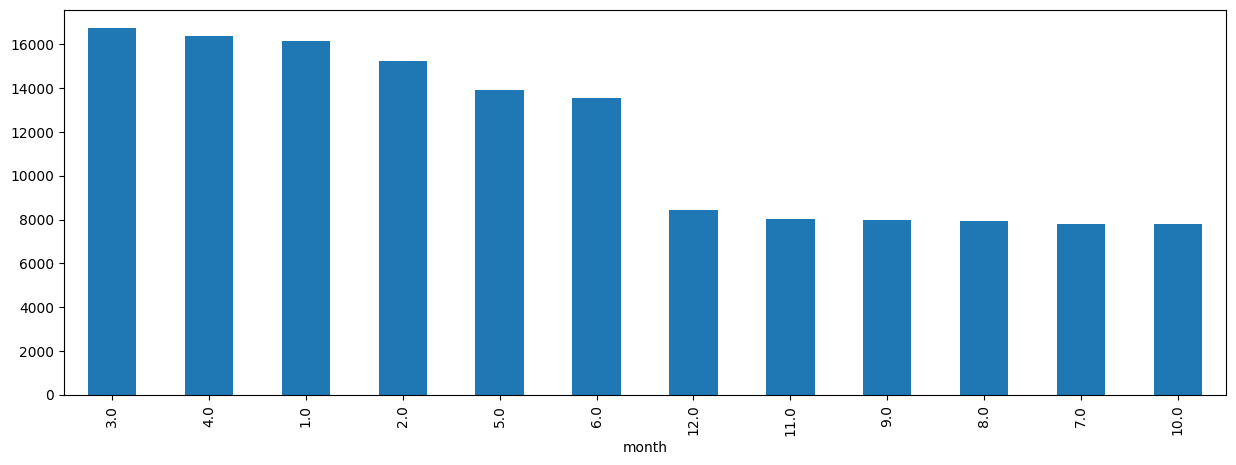

In [37]:
# lets plot our article distribution by month
# we can use value_counts
# pandas offers a plot method
articles['month'].value_counts().plot(kind='bar',figsize=(15,5))

<Axes: xlabel='month'>

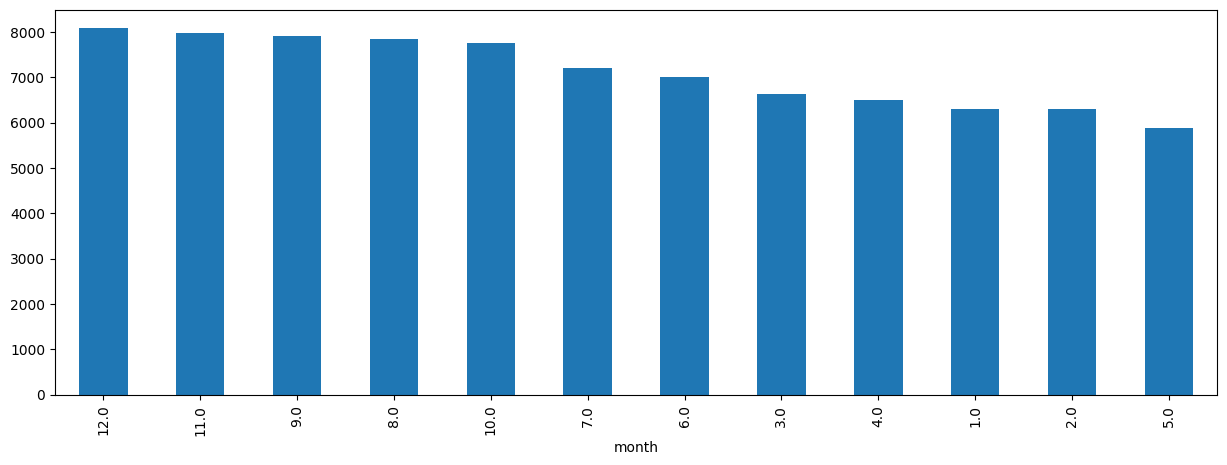

In [38]:
# let's check distribution of articles by month in year 2016
# we can use value_counts
# pandas offers a plot method

# first we filter our dataframe to only include articles from 2016
# then we use value_counts to count the number of articles by month
# finally we plot the results
articles[articles['year'] == 2016]['month'].value_counts().plot(kind='bar',figsize=(15,5))

<Axes: xlabel='month'>

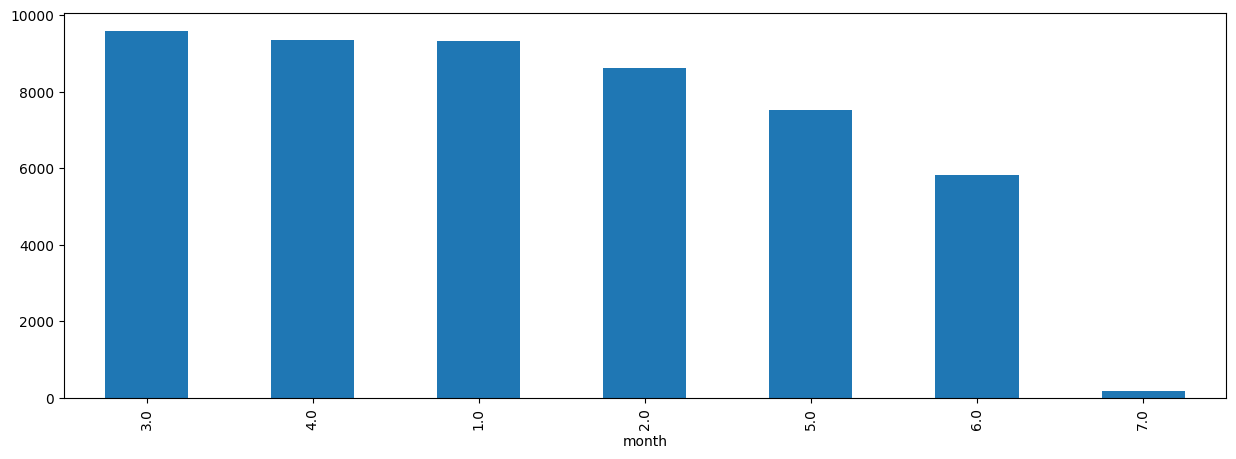

In [39]:
# so how about year 2017?
# we can use value_counts
# pandas offers a plot method

# first we filter our dataframe to only include articles from 2017
# then we use value_counts to count the number of articles by month
# finally we plot the results
articles[articles['year'] == 2017]['month'].value_counts().plot(kind='bar',figsize=(15,5))

In [40]:
# lets sort articles by date
# certainly looks like looks like this is the order they were published
articles.sort_values(by='date').head()

,title,publication,author,date,year,month,url,content
id,,,,,,,,
162183,How Nirvana’s ’Smells Like Teen Spirit’ Became...,NPR,Guy Raz,2000-05-15,2000.0,5.0,http://www.npr.org/2000/05/15/1074173/smells-l...,"In the early 1990s, Seattle stood at the cente..."
89568,Everything changes. Everything. Especially,Talking Points Memo,NaN,2003-06-14,2003.0,6.0,https://web.archive.org/web/20170222000427/htt...,Part of America’s special nature good and ...
166319,David Bowie On The Ziggy Stardust Years: ’We W...,NPR,NPR Staff,2003-09-19,2003.0,9.0,http://www.npr.org/2003/09/19/1436453/musician...,It’s been more than 40 years since David Bowie...
83402,Nancy Reagan’s Alzheimer’s Crusade,Fox News,NaN,2004-06-06,2004.0,6.0,https://web.archive.org/web/20160306220058/htt...,When Nancy Reagan (search) appeared at a ga...
87592,One final thought on,Talking Points Memo,NaN,2004-11-18,2004.0,11.0,https://web.archive.org/web/20170103031234/htt...,Josh Marshall is editor and publisher of Talki...


In [50]:
# so last 10 articles in this dataset by date
articles[~articles.date.isna()].sort_values(by='date').tail(10)

,title,publication,author,date,year,month,url,content
id,,,,,,,,
197484,9 questions with Henry Rollins,Vox,Sean Illing,2017/4/8,2017.0,4.0,http://www.vox.com/conversations/2017/4/8/1520...,"This week, Henry Rollins — musician, write..."
197479,"The war in Syria, explained",Vox,Zack Beauchamp,2017/4/8,2017.0,4.0,http://www.vox.com/2017/4/8/15218782/syria-tru...,"On the face of it, President Trump’s decision..."
197489,"The wistful, animated film Your Name was a hug...",Vox,Todd VanDerWerff,2017/4/8,2017.0,4.0,http://www.vox.com/2017/4/8/15223458/your-name...,Nearly every article you read about Your Name...
197486,Uber just fired the engineer at the center of ...,Vox,Timothy B. Lee,2017/4/8,2017.0,4.0,http://www.vox.com/new-money/2017/4/8/15205610...,Uber has fired the star engineer who has been...
197525,What Trump’s Syria strike means for his war on...,Vox,Zeeshan Aleem,2017/4/9,2017.0,4.0,http://www.vox.com/world/2017/4/9/15223252/tru...,"When Donald Trump ran for president, he showe..."
197528,The Trump administration seems to have no cohe...,Vox,Zeeshan Aleem,2017/4/9,2017.0,4.0,http://www.vox.com/2017/4/9/15235232/trump-syr...,Days after President Trump launched 59 Tomaha...
197531,Alec Baldwin is clearly tired of playing Trump...,Vox,Constance Grady,2017/4/9,2017.0,4.0,http://www.vox.com/culture/2017/4/9/15233776/w...,"Wow, is Alec Baldwin getting sick of playing ..."
197532,Homeland season 6 simply can’t compete with re...,Vox,Todd VanDerWerff,2017/4/9,2017.0,4.0,http://www.vox.com/culture/2017/4/9/15215630/h...,"Every Sunday, we pick a new episode of the we..."
197537,Fast and Furious 8: 5 things to know about The...,Vox,Alex Abad-Santos,2017/4/9,2017.0,4.0,http://www.vox.com/2017/4/9/15218064/fast-and-...,"Fast and Furious 8: The Fate of the Furious, ..."


In [41]:
# so last 10 articles in this dataset by date
# we will sort by year then month as the tiebreaker
articles[~articles.date.isna()].sort_values(by=['year','month']).tail(10)

,title,publication,author,date,year,month,url,content
id,,,,,,,,
208844,How to handle an unhinged president,Washington Post,Michael Gerson,2017-07-06,2017.0,7.0,https://web.archive.org/web/20170707000018/htt...,It is sometimes argued that the media should ...
208845,Trump wants us to defend ‘our values.’ Which o...,Washington Post,Editorial Board,2017-07-06,2017.0,7.0,https://web.archive.org/web/20170707000018/htt...,“DO WE have the confidence in our values to d...
208846,DOJ: Some sanctuary jurisdictions ‘boldly asse...,Washington Post,Maria Sacchetti,2017-07-06,2017.0,7.0,https://web.archive.org/web/20170707000018/htt...,The Department of Justice said Thursday that ...
208847,Trump voter commission to store data on White ...,Washington Post,Spencer S. Hsu,2017-07-06,2017.0,7.0,https://web.archive.org/web/20170707000018/htt...,The Trump administration announced plans to k...
208848,Rick Perry offered a ‘little economics lesson....,Washington Post,Max Ehrenfreund,2017-07-06,2017.0,7.0,https://web.archive.org/web/20170707000018/htt...,Speaking at a power plant in Maidsville...
208849,Trump administration to name Georgia health of...,Washington Post,Lena H. Sun,2017-07-06,2017.0,7.0,https://web.archive.org/web/20170707000018/htt...,The Trump administration plans to appoint...
208850,Trump tweets a video with a very unfortunate F...,Washington Post,Aaron Blake,2017-07-06,2017.0,7.0,https://web.archive.org/web/20170707000018/htt...,Fox News is probably happy to have the preside...
208851,"U.S. hospital offers to admit Charlie Gard, th...",Washington Post,Lindsey Bever,2017-07-06,2017.0,7.0,https://web.archive.org/web/20170707000018/htt...,A major New York hospital has offered...
208852,How the new ‘Spider-Man’ is really a John Hugh...,Washington Post,Michael Cavna,2017-07-06,2017.0,7.0,https://web.archive.org/web/20170707000018/htt...,THE WORDS “superhero fatigue” have been l...


In [52]:
# we might want to include objects (strings usually) in our basic stats
articles.describe(include="O")

,title,publication,author,date,url,content
count,142568,142570,126694,139929,85559,142570
unique,142132,15,15647,1646,85559,142038
top,,Breitbart,Breitbart News,2017-02-03,https://web.archive.org/web/20160101000951/htt...,advertisement
freq,12,23781,1559,402,1,42


# 📰 Articles by Publications 

Breitbart leads the pack

In [ ]:
articles['publication'].value_counts() # this gives us counts for particular column
# here you would write some explanation on why such distribution might be expected
# what is the reason for Breitbart having so many articles
# and why Fox News has so many articles

publication
Breitbart              23781
New York Post          17493
NPR                    11992
CNN                    11488
Washington Post        11114
Reuters                10710
Guardian                8681
New York Times          7803
Atlantic                7179
Business Insider        6757
National Review         6203
Talking Points Memo     5214
Vox                     4947
Buzzfeed News           4854
Fox News                4354
Name: count, dtype: int64

In [ ]:
# articles.to_excel("articles_30k.xlsx")

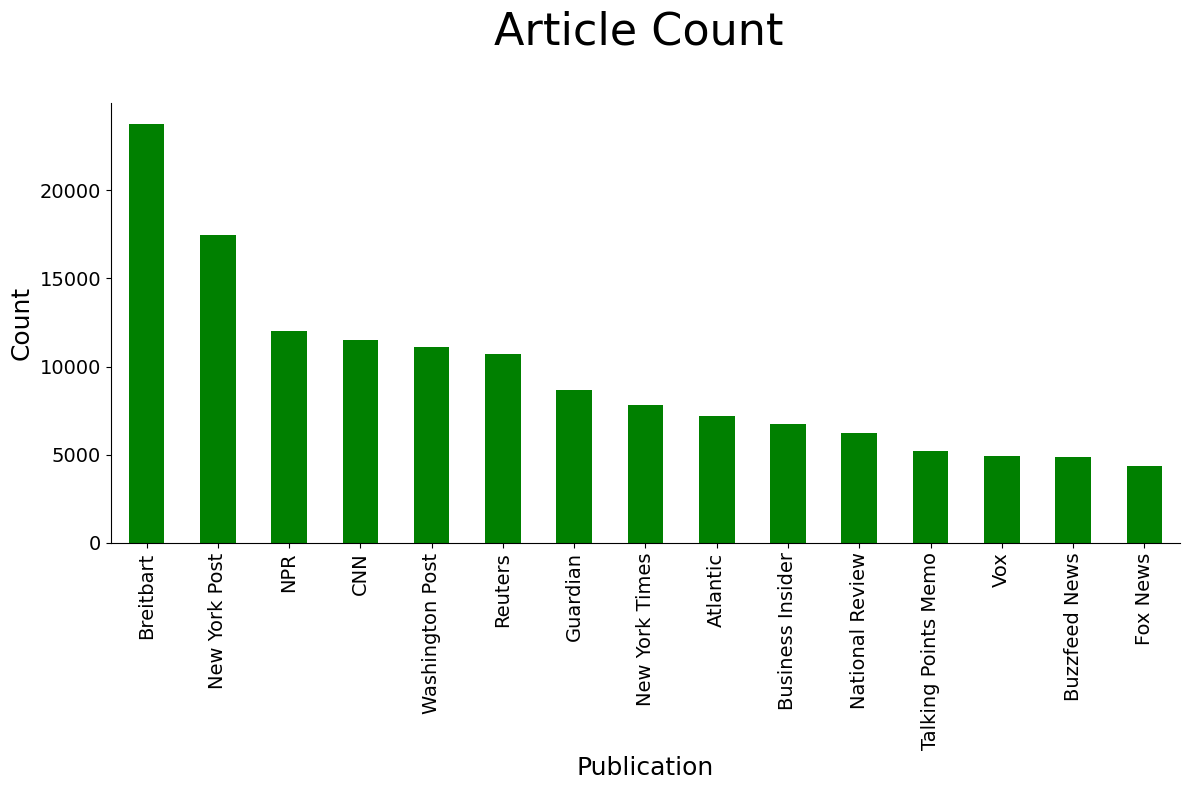

In [ ]:
# ax = articles['publication'].value_counts().sort_index().plot(kind='bar', fontsize=14, figsize=(12,10))
# ax.set_title('Article Count\n', fontsize=20)
# ax.set_xlabel('Publication', fontsize=18)
# ax.set_ylabel('Count', fontsize=18)
# plt.tight_layout()
# sns.despine();

ax = articles['publication'].value_counts().plot(kind='bar', fontsize=14, figsize=(12,8), color="green")
ax.set_title('Article Count \n', fontsize=32)
ax.set_xlabel('Publication', fontsize=18)
ax.set_ylabel('Count', fontsize=18)
plt.tight_layout()
plt.savefig("publications.png", format="png")
# there are other formats such as jpg, pdf, svg available
sns.despine(); # we use ; to suppress output

# 🗞️ Length of articles

In [ ]:
# preprocessing data - something you do in NLP

In [44]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# so we want to strip out all punctuation, usually you have no need for punctuation for text analysis
# unless you are analysis punctuation :)


In [45]:
# this function takes text as input and returns the text with all punctuation removed
# also it converts all text to lower case
# finally it removes all white space that is occuring more than once
def clean_text(article):
    # removes punctuation and converts all the text to lower case
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", article.lower())
    # so stripping all punctuation and making everything lowercase (for some analysis you might want to keep uppercase such as Named Entities)
    return re.sub(r'\W+', ' ', clean1)

In [46]:
txt = "A quick Brown Bear jumped over a sleeping fox - wait what is this text?"
txt

'A quick Brown Bear jumped over a sleeping fox - wait what is this text?'

In [47]:
clean_text(txt) #testing the function

'a quick brown bear jumped over a sleeping fox wait what is this text'

In [58]:
articles.head(1)

,title,publication,author,date,year,month,url,content
id,,,,,,,,
17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...


In [50]:
print(str(articles.head(1).content))

id
17283    WASHINGTON  —   Congressional Republicans have...
Name: content, dtype: object


In [51]:
articles["content"].head(1)

id
17283    WASHINGTON  —   Congressional Republicans have...
Name: content, dtype: object

In [60]:
clean_text(articles["content"][17283])

'washington congressional republicans have a new fear when it comes to their health care lawsuit against the obama administration they might win the incoming trump administration could choose to no longer defend the executive branch against the suit which challenges the administrations authority to spend billions of dollars on health insurance subsidies for and americans handing house republicans a big victory on issues but a sudden loss of the disputed subsidies could conceivably cause the health care program to implode leaving millions of people without access to health insurance before republicans have prepared a replacement that could lead to chaos in the insurance market and spur a political backlash just as republicans gain full control of the government to stave off that outcome republicans could find themselves in the awkward position of appropriating huge sums to temporarily prop up the obama health care law angering conservative voters who have been demanding an end to the la

In [52]:
# our goal is to get rid of empty articles
# empty articles are useless for our analysis

# add a new column called tokenized using content and for each content row using clean_text function
# articles['clean_text'] = articles['content'].map(lambda x: clean_text(x))
# let's do apply
articles['clean_text'] = articles['content'].apply(clean_text)
# it is like writing a loop but in Pandas we usually do not write loops
articles.head() # about 2 minutes to run
# map in pandas is similar to apply in pandas
# we pass a function to map and it applies the function to each row of the column
# lambda x: clean_text(x) is a function that takes x as input and returns clean_text(x)

,title,publication,author,date,year,month,url,content,clean_text
id,,,,,,,,,
17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,washington congressional republicans have a ne...
17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...",after the bullet shells get counted the blood ...
17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",when walt disneys bambi opened in 1942 critics...
17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",death may be the great equalizer but it isnt n...
17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",seoul south korea north koreas leader kim said...


In [53]:
# add a new column with word count for each article
articles['num_wds'] = articles['clean_text'].apply(lambda x: len(x.split()))  # by default split splits by whitespace
articles.head()

,title,publication,author,date,year,month,url,content,clean_text,num_wds
id,,,,,,,,,,
17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,washington congressional republicans have a ne...,876
17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...",after the bullet shells get counted the blood ...,4743
17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",when walt disneys bambi opened in 1942 critics...,2350
17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",death may be the great equalizer but it isnt n...,2104
17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",seoul south korea north koreas leader kim said...,690


In [54]:
# let's add a column with character count for each article
# articles['num_chars'] = articles['clean_text'].apply(lambda x: len(x))
# even faster would be str.len
articles['num_chars'] = articles['clean_text'].str.len()
# so for each row in clean_text column we are applying a function that returns the length of the text
# we save the result in a new column called num_chars
articles.head()

,title,publication,author,date,year,month,url,content,clean_text,num_wds,num_chars
id,,,,,,,,,,,
17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,washington congressional republicans have a ne...,876,5458
17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...",after the bullet shells get counted the blood ...,4743,26950
17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",when walt disneys bambi opened in 1942 critics...,2350,13339
17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",death may be the great equalizer but it isnt n...,2104,11803
17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",seoul south korea north koreas leader kim said...,690,4044


In [55]:
articles.describe() # now we will have more columns in our stats

,year,month,num_wds,num_chars
count,139929.000000,139929.000000,142570.000000,142570.000000
mean,2016.324529,5.509037,732.360125,4235.252886
std,0.563476,3.365309,744.028426,4247.595169
min,2000.000000,1.000000,0.000000,0.000000
25%,2016.000000,3.000000,336.000000,1946.000000
50%,2016.000000,5.000000,585.000000,3395.000000
75%,2017.000000,8.000000,912.000000,5297.000000
max,2017.000000,12.000000,49902.000000,281095.000000


In [56]:

# articles['tokenized'] = articles['content'].map(lambda x: clean_text(x))
# articles['num_wds'] = articles['tokenized'].apply(lambda x: len(x.split()))

print(f"Average number of words in an article: {int(articles['num_wds'].mean())}")
print(f"Longest article: {int(articles['num_wds'].max())}, Shortest: {int(articles['num_wds'].min())}")

print(f"\nRemoving {len(articles[articles['num_wds']==0])} articles with {int(articles['num_wds'].min())} words.")
articles = articles[articles['num_wds']>0] # we are saying here keep only articles which have num_wds column value over 0

Average number of words in an article: 732
Longest article: 49902, Shortest: 0

Removing 97 articles with 0 words.


In [ ]:
# articles.to_csv("../kaggle/articles_clean.csv") #TODO look into compressing into zip, since 1.2GB takes a while
# keep in mind we almost doubled our data size
# why? class answer


In [68]:
articles.sample(5)

,title,publication,author,date,year,month,url,content,clean_text,num_wds,num_chars
id,,,,,,,,,,,
197057,9 questions for Neil deGrasse Tyson,Vox,Sean Illing,2017/3/25,2017.0,3.0,http://www.vox.com/conversations/2017/3/25/149...,"This week, Neil deGrasse Tyson — astrophys...",this week neil degrasse tyson astrophysicist ...,288,1590
45563,SCOTUS Issues Blow to Texas Abortion Law: Stri...,Breitbart,Lana Shadwick,2016-06-27,2016.0,6.0,NaN,The United States Supreme Court has issued a d...,the united states supreme court has issued a d...,321,1953
167279,VIDEO: Taking Out The Trash At The Space Station,NPR,Bill Chappell,2016-02-19,2016.0,2.0,http://www.npr.org/sections/thetwo-way/2016/02...,Today was trash day on the International Space...,today was trash day on the international space...,181,975
118301,The GOP Battle for Michigan,National Review,George Will,2016-03-05,2016.0,3.0,http://www.nationalreview.com/article/432315/d...,"Dearborn, Mich. — It is here in the industr...",dearborn mich it is here in the industrial mid...,632,3731
168960,Advance In Human Embryo Research Rekindles Eth...,NPR,Rob Stein,2016-05-04,2016.0,5.0,http://www.npr.org/sections/health-shots/2016/...,Scientists have been able to make and study hu...,scientists have been able to make and study hu...,1039,5921


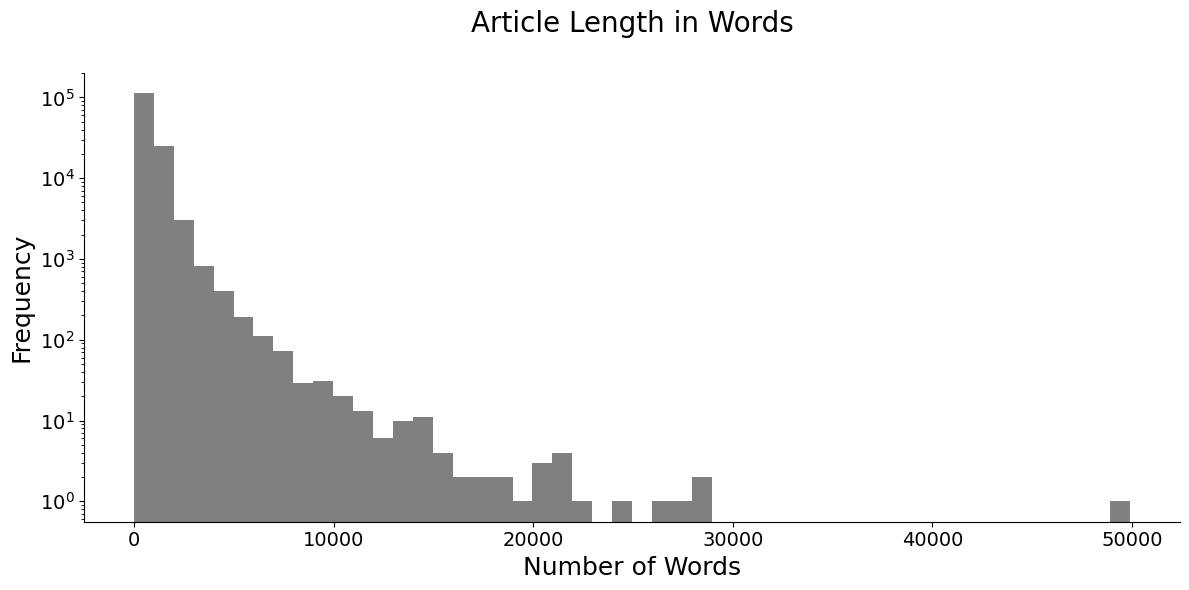

In [57]:
# we are going to plot article length in words
# we will use log scale for y axis
# why?
# because we have a lot of articles with very few words
ax=articles['num_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,6), color="gray")
ax.set_title('Article Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18)
ax.set_yscale("log") # we are using Log scale here
plt.tight_layout()
sns.despine();

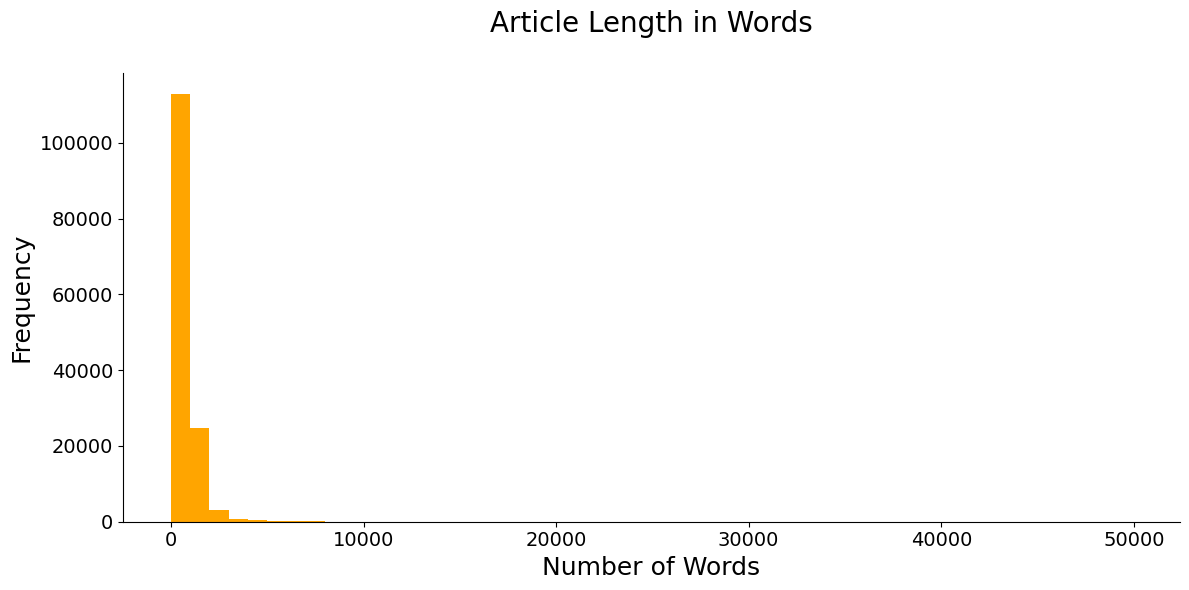

In [58]:
ax=articles['num_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,6), color="orange")
ax.set_title('Article Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18)
# without log scale the plot is not as informative
# ax.set_yscale("log") # we are using Log scale here
plt.tight_layout()
sns.despine();

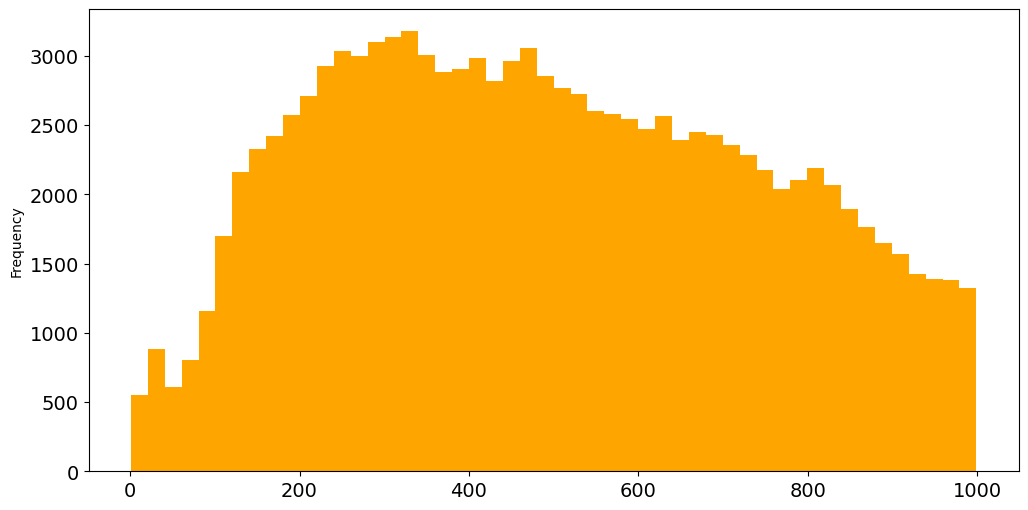

In [59]:
# let's plot article distribution where words are less than 1000
# first we filter the data frame to only include articles with less than 1000 words
# then we select the num_wds column and plot it
ax=articles[articles['num_wds']<1000]['num_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,6), color="orange")

In [60]:
long_reads = articles[articles.num_wds > 25_000]
long_reads.shape

(5, 11)

In [73]:
long_reads.columns

Index(['title', 'publication', 'author', 'date', 'year', 'month', 'url',
       'content', 'clean_text', 'num_wds', 'num_chars'],
      dtype='object')

In [68]:
long_reads["content"] # certainly looks like a long read of reader letters to the editor

57082    Atlantic readers from across the political spe...
57087       Atlantic readers from across the political ...
57099    Atlantic readers from across the political spe...
Name: content, dtype: object

In [75]:
long_reads.head(1)

,id,title,publication,author,date,year,month,url,content,tokenized,num_wds
57082,78406,\nWill the Liberal Bubble Burst? Your Thoughts\n,Atlantic,Chris Bodenner,2016-11-21,2016.0,11.0,NaN,Atlantic readers from across the political spe...,atlantic readers from across the political spe...,28836


In [76]:
long_reads.loc[57082].content

'Atlantic readers from across the political spectrum discuss the results of the U. S. presidential election and what it means for the country. (The Atlantic’s overall stance on Donald Trump remains firm.) To join in, especially if you’re a Trump voter, please send us a note: hello@theatlantic. com. ’Saturday Night Live’ punctures the liberal bubble https:  .  pic. twitter.  My colleague Andrew McGill wrote a punchy piece over the weekend called “The U. S. Media’s Real Elitism Problem. ” An excerpt: In the aftermath [of Trump’s victory] many of the immediate   blamed a coastal bubble: Too many journalists had grown nearsighted in urban Democratic enclaves, the reasoning went, blinding them to what was taking place in Middle America. If more reporters actually spent time in   country, instead of jetting through for a rally, they’d understand why Donald Trump won voters over. [. ..] [T]here’s little question the journalistic class has diverged sharply from the country it covers. In 1960, 

In [ ]:
long_reads

,id,title,publication,author,date,year,month,url,content,tokenized,num_wds
57082,78406,\nWill the Liberal Bubble Burst? Your Thoughts\n,Atlantic,Chris Bodenner,2016-11-21,2016.0,11.0,NaN,Atlantic readers from across the political spe...,atlantic readers from across the political spe...,28836
57087,78411,\nTake It From a ‘Liberal Redneck’\n,Atlantic,Chris Bodenner,2016-11-22,2016.0,11.0,NaN,Atlantic readers from across the political ...,atlantic readers from across the political sp...,28430
57099,78426,\nTrying to Avoid Politics Over Thanksgiving\n,Atlantic,Rosa Inocencio Smith,2016-11-30,2016.0,11.0,NaN,Atlantic readers from across the political spe...,atlantic readers from across the political spe...,26813
136581,206095,Full transcript: FBI Director James Comey test...,Washington Post,Washington Post Staff,2017-03-20,2017.0,3.0,https://web.archive.org/web/20170321001527/htt...,Below is the full transcript from the...,below is the full transcript from the house i...,49902
137587,207354,Full transcript: Sally Yates and James Clapper...,Washington Post,Washington Post Staff,2017-05-08,2017.0,5.0,https://web.archive.org/web/20170509003603/htt...,Former acting attorney general Sally...,former acting attorney general sally yates an...,27485


In [77]:
long_reads.sort_values(by="num_wds", ascending=False)

,id,title,publication,author,date,year,month,url,content,tokenized,num_wds
57082,78406,\nWill the Liberal Bubble Burst? Your Thoughts\n,Atlantic,Chris Bodenner,2016-11-21,2016.0,11.0,NaN,Atlantic readers from across the political spe...,atlantic readers from across the political spe...,28836
57087,78411,\nTake It From a ‘Liberal Redneck’\n,Atlantic,Chris Bodenner,2016-11-22,2016.0,11.0,NaN,Atlantic readers from across the political ...,atlantic readers from across the political sp...,28430
57099,78426,\nTrying to Avoid Politics Over Thanksgiving\n,Atlantic,Rosa Inocencio Smith,2016-11-30,2016.0,11.0,NaN,Atlantic readers from across the political spe...,atlantic readers from across the political spe...,26813


In [78]:
long_reads[long_reads["id"] == 78406]["content"].values

array(['Atlantic readers from across the political spectrum discuss the results of the U. S. presidential election and what it means for the country. (The Atlantic’s overall stance on Donald Trump remains firm.) To join in, especially if you’re a Trump voter, please send us a note: hello@theatlantic. com. ’Saturday Night Live’ punctures the liberal bubble https:  .  pic. twitter.  My colleague Andrew McGill wrote a punchy piece over the weekend called “The U. S. Media’s Real Elitism Problem. ” An excerpt: In the aftermath [of Trump’s victory] many of the immediate   blamed a coastal bubble: Too many journalists had grown nearsighted in urban Democratic enclaves, the reasoning went, blinding them to what was taking place in Middle America. If more reporters actually spent time in   country, instead of jetting through for a rally, they’d understand why Donald Trump won voters over. [. ..] [T]here’s little question the journalistic class has diverged sharply from the country it covers. In

# 💬 Unique words

In [61]:
txt = "a quick brown fox jumped over a sleeping fox"
tokens = txt.split()
len(tokens), len(set(tokens))

(9, 7)

In [62]:
from datetime import datetime as dt
now = dt.now()
now

datetime.datetime(2024, 12, 6, 19, 35, 18, 677987)

In [63]:
# number of unique words in each article
# shows how to take a time stamp to calculate how long it takes to run a function
start = dt.now()
articles['uniq_wds'] = articles['clean_text'].str.split().apply(lambda x: len(set(x))) # see above cell for example
end = dt.now()
print(f"Spent {end-start} ms on processing")
print(f"Average number of unique words in an article: {int(articles['uniq_wds'].mean())}")
print(f"Maximum unique word: {int(articles['uniq_wds'].max())}, Minimum: {int(articles['uniq_wds'].min())}")

Spent 0:00:20.574518 ms on processing
Average number of unique words in an article: 336
Maximum unique word: 4692, Minimum: 1


In [86]:
articles.head()

,id,title,publication,author,date,year,month,url,content,tokenized,num_wds,uniq_wds
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,washington congressional republicans have a ne...,876,389
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...",after the bullet shells get counted the blood ...,4743,1403
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",when walt disneys bambi opened in 1942 critics...,2350,920
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",death may be the great equalizer but it isnt n...,2104,1037
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",seoul south korea north koreas leader kim said...,690,307


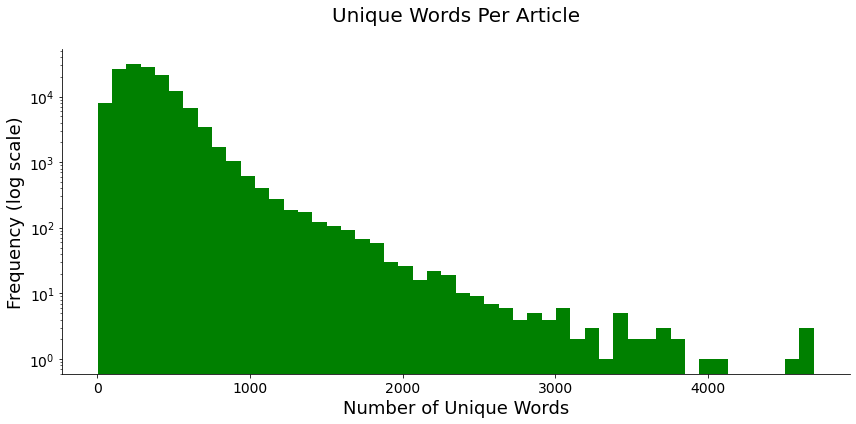

In [77]:
ax=articles['uniq_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,6), color="green")
ax.set_title('Unique Words Per Article\n', fontsize=20)
ax.set_ylabel('Frequency (log scale)', fontsize=18)
ax.set_xlabel('Number of Unique Words', fontsize=18)
ax.set_yscale("log")
plt.tight_layout()
sns.despine();

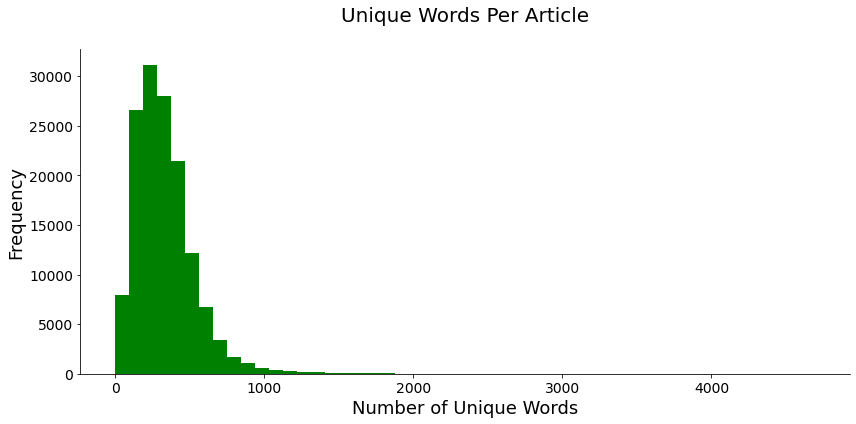

In [78]:
ax=articles['uniq_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,6), color="green")
ax.set_title('Unique Words Per Article\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Unique Words', fontsize=18)
# ax.set_yscale("log")
plt.tight_layout()
sns.despine();

# 🥊 Vox vs. Business Insider. You decide

In [64]:
# you are grouping by each individual publication in publication column
articles.groupby('publication').describe()
# it would be like filtering each unique publication and then running describe on each group

year                                                 \
                       count         mean       std     min     25%     50%   
publication                                                                   
Atlantic              7178.0  2016.282530  0.450261  2016.0  2016.0  2016.0   
Breitbart            23781.0  2016.316471  0.472909  2013.0  2016.0  2016.0   
Business Insider      6695.0  2016.320836  0.466833  2016.0  2016.0  2016.0   
Buzzfeed News         4835.0  2016.328025  0.469542  2016.0  2016.0  2016.0   
CNN                  11485.0  2015.972834  0.918364  2011.0  2015.0  2016.0   
Fox News              4349.0  2015.988963  0.217385  2004.0  2016.0  2016.0   
Guardian              8640.0  2016.497917  0.521109  2009.0  2016.0  2017.0   
NPR                  11992.0  2016.320213  0.602747  2000.0  2016.0  2016.0   
National Review       6195.0  2016.310896  0.501405  2005.0  2016.0  2016.0   
New York Post        17493.0  2016.480878  0.505450  2014.0  2016.0  2016.0   
New York Times        7803.0  2016.533897  0.500421  2014.0  2016.0  2017.0   
Reuters              10710.0  2016.419514  0.501200  2012.0  2016.0  2016.0   
Talking Points Memo   2615.0  2015.990440  0.483374  2003.0  2016.0  2016.0   
Vox                   4947.0  2016.310289  0.505671  2014.0  2016.0  2016.0   
Washington Post      11114.0  2016.342091  0.484751  2011.0  2016.0  2016.0   

                                       month            ... num_chars  \
                        75%     max    count      mean  ...       75%   
publication                                             ...             
Atlantic             2017.0  2017.0   7178.0  6.186821  ...   8293.75   
Breitbart            2017.0  2017.0  23781.0  5.458223  ...   3315.00   
Business Insider     2017.0  2017.0   6695.0  5.517700  ...   3003.50   
Buzzfeed News        2017.0  2017.0   4835.0  5.327611  ...   5613.50   
CNN                  2017.0  2017.0  11485.0  5.742708  ...   5359.00   
Fox News             2016.0  2016.0   4349.0  6.677627  ...   4071.50   
Guardian             2017.0  2017.0   8640.0  6.244907  ...   6097.00   
NPR                  2017.0  2017.0  11992.0  5.560957  ...   5296.00   
National Review      2017.0  2017.0   6195.0  5.414851  ...   6272.50   
New York Post        2017.0  2017.0  17493.0  5.035157  ...   3217.00   
New York Times       2017.0  2017.0   7803.0  5.392029  ...   7611.50   
Reuters              2017.0  2017.0  10710.0  5.355742  ...   4830.00   
Talking Points Memo  2016.0  2017.0   2615.0  2.902103  ...   2586.00   
Vox                  2017.0  2017.0   4947.0  5.359005  ...  10007.50   
Washington Post      2017.0  2017.0  11114.0  5.647652  ...   7179.75   

                              uniq_wds                                       \
                          max    count        mean         std   min    25%   
publication                                                                   
Atlantic             159204.0   7178.0  525.359153  373.256826   6.0  343.0   
Breitbart            139792.0  23781.0  238.076868  176.130712   1.0  141.0   
Business Insider      44116.0   6695.0  207.972218  158.154727   1.0  108.0   
Buzzfeed News         66218.0   4835.0  352.212410  276.456493   6.0  186.0   
CNN                   71286.0  11485.0  327.239965  172.334575   3.0  204.0   
Fox News              49826.0   4351.0  265.413009  131.899006   3.0  168.0   
Guardian              84682.0   8680.0  409.880760  216.412752   8.0  275.0   
NPR                   51723.0  11992.0  351.701384  162.773142  11.0  252.0   
National Review       70985.0   6195.0  432.680710  188.094907   1.0  330.0   
New York Post         33217.0  17493.0  231.885840  122.583680   4.0  144.0   
New York Times        92919.0   7803.0  494.963091  223.794745   1.0  368.0   
Reuters               32247.0  10710.0  343.440243   99.501974  51.0  270.0   
Talking Points Memo   42340.0   5214.0  186.524166  142.801459   2.0  100.0   
Vox                   

In [65]:
articles.groupby('publication').describe().T # transposing data for better visibility

publication           Atlantic      Breitbart  Business Insider  \
year      count    7178.000000   23781.000000       6695.000000   
          mean     2016.282530    2016.316471       2016.320836   
          std         0.450261       0.472909          0.466833   
          min      2016.000000    2013.000000       2016.000000   
          25%      2016.000000    2016.000000       2016.000000   
          50%      2016.000000    2016.000000       2016.000000   
          75%      2017.000000    2017.000000       2017.000000   
          max      2017.000000    2017.000000       2017.000000   
month     count    7178.000000   23781.000000       6695.000000   
          mean        6.186821       5.458223          5.517700   
          std         3.406558       3.313807          3.319768   
          min         1.000000       1.000000          1.000000   
          25%         3.000000       3.000000          3.000000   
          50%         6.000000       5.000000          5.000000   
          75%         9.000000       8.000000          8.000000   
          max        12.000000      12.000000         12.000000   
num_wds   count    7178.000000   23781.000000       6695.000000   
          mean     1315.810393     490.417897        424.301718   
          std      1675.734959     590.375344        475.666874   
          min         6.000000       1.000000          1.000000   
          25%       647.000000     236.000000        169.000000   
          50%       955.000000     366.000000        301.000000   
          75%      1419.750000     565.000000        521.000000   
          max     28836.000000   24736.000000       8418.000000   
num_chars count    7178.000000   23781.000000       6695.000000   
          mean     7614.100028    2860.470249       2443.580284   
          std      9575.995676    3394.149557       2675.299336   
          min        37.000000      13.000000          5.000000   
          25%      3826.000000    1369.000000        977.000000   
          50%      5573.000000    2136.000000       1742.000000   
          75%      8293.750000    3315.000000       3003.500000   
          max    159204.000000  139792.000000      44116.000000   
uniq_wds  count    7178.000000   23781.000000       6695.000000   
          mean      525.359153     238.076868        207.972218   
          std       373.256826     176.130712        158.154727   
          min         6.000000       1.000000          1.000000   
          25%       343.000000     141.000000        108.000000   
          50%       460.000000     203.000000        172.000000   
          75%       604.000000     285.000000        264.000000   
          max      4692.000000    4584.000000       1784.000000   

publication      Buzzfeed News           CNN      Fox News      Guardian  \
year      count    4835.000000  11485.000000   4349.000000   8640.000000   
          mean     2016.328025   2015.972834   2015.988963   2016.497917   
          std         0.469542      0.918364      0.217385      0.521109   
          min      2016.000000   2011.000000   2004.000000   2009.000000   
          25%      2016.000000   2015.000000   2016.000000   2016.000000   
          50%      2016.000000   2016.000000   2016.000000   2017.000000   
          75%      2017.000000   2017.000000   2016.000000   2017.000000   
          max      2017.000000   2017.000000   2016.000000   2017.000000   
month     count    4835.000000  11485.000000   4349.000000   8640.000000   
          mean        5.327611      5.742708      6.677627      6.244907   
          std         3.576375      3.205771      3.399768      3.343646   
          min         1.000000      1.000000      1.000000      1.000000   
          25%         2.000000      3.000000      4.000000      3.000000   
          50%         4.000000      6.000000      7.000000      6.000000   
          75%         9.000000      8.000000     10.000000      9.000000   
          max        12.000000     1

In [92]:
# we can save the results if we wish of ours stats
articles.groupby('publication').describe().T.to_excel("publication_stats.xlsx")

C:\Users\val-wd\AppData\Local\Temp\ipykernel_172\758952160.py:4: FutureWarning: The provided callable <function mean at 0x0000020F26A96480> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  publications = art_grps['num_wds'].aggregate(np.mean).index.tolist()
C:\Users\val-wd\AppData\Local\Temp\ipykernel_172\758952160.py:5: FutureWarning: The provided callable <function mean at 0x0000020F26A96480> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  avg_words = art_grps['num_wds'].aggregate(np.mean).values
C:\Users\val-wd\AppData\Local\Temp\ipykernel_172\758952160.py:6: FutureWarning: The provided callable <function mean at 0x0000020F26A96480> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used 

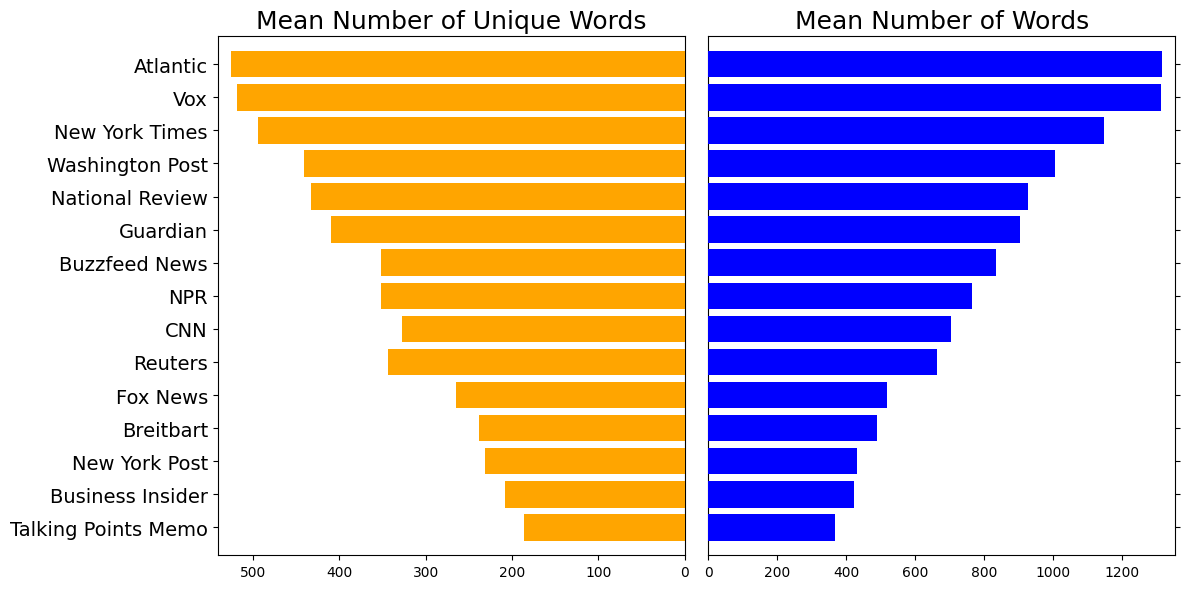

In [66]:
# Data
art_grps = articles.groupby('publication')

publications = art_grps['num_wds'].aggregate(np.mean).index.tolist()
avg_words = art_grps['num_wds'].aggregate(np.mean).values
unique_words = art_grps['uniq_wds'].aggregate(np.mean).values

# Sort by number of avg_words
idx = avg_words.argsort()
publications, avg_words, unique_words = [np.take(x, idx) for x in [publications, avg_words, unique_words]]

y = np.arange(unique_words.size)

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(12,6))
axes[0].barh(y, unique_words, align='center', color='orange', zorder=10)
axes[0].set_title('Mean Number of Unique Words', fontsize=18)
axes[1].barh(y, avg_words, align='center', color='blue', zorder=10)
axes[1].set_title('Mean Number of Words', fontsize=18)

axes[0].invert_xaxis()
axes[0].set_yticks(y)
axes[0].set_yticklabels(publications, fontsize=14)
axes[0].yaxis.tick_left()

axes[1].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(False)

fig.tight_layout()
fig.subplots_adjust(wspace=0)
plt.savefig("publications_word_use.png")
plt.tight_layout();

# 👄 Most common words

In [69]:
# stopwords are words which are common and do not add much meaning to the text
# for most analysis we remove stopwords

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\val-
[nltk_data]     wd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [68]:
stopwords.words('spanish')

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [70]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [71]:
len(stopwords.words('english'))

179

In [72]:
stopwords.words('russian')

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [73]:
wd_counts = Counter()
for i, row in articles.iterrows(): # iterrows is how we go row by row in Pandas Dataframe # this is slow way
    wd_counts.update(row['clean_text'].split()) # for each row we count the words in tokenized column

# we will delete stopwords later
# for sw in stopwords.words('english'):
#     del wd_counts[sw]

    
wd_counts.most_common(20)

[('the', 6016192),
 ('to', 2949026),
 ('of', 2655450),
 ('a', 2565764),
 ('and', 2532129),
 ('in', 2122187),
 ('that', 1429531),
 ('for', 994221),
 ('is', 989551),
 ('on', 921245),
 ('it', 726747),
 ('was', 716995),
 ('he', 705610),
 ('with', 697801),
 ('as', 657029),
 ('said', 571476),
 ('his', 521476),
 ('at', 512330),
 ('i', 501694),
 ('have', 493491)]

In [74]:
# so stopwords could be useful to analyzie style of authors but 
# here they will not help a topic analysis - in our case climate change
for sw in stopwords.words('english'): # for latvian you would use stopwords.words('latvian') if you have latvian text
    del wd_counts[sw]
wd_counts.most_common(20)

[('said', 571476),
 ('trump', 359436),
 ('would', 263184),
 ('one', 260552),
 ('people', 246748),
 ('new', 205187),
 ('also', 181491),
 ('like', 178532),
 ('president', 161541),
 ('time', 144047),
 ('could', 143626),
 ('first', 132971),
 ('years', 131219),
 ('two', 126745),
 ('even', 124510),
 ('says', 123381),
 ('state', 118926),
 ('many', 116965),
 ('u', 116602),
 ('last', 115748)]

# 🌂 How many articles are talking about climate change? 

Let's identify keywords that might correlate with the topic, and search for them in the articles. 

We want the string **`chang`** followed by the string **`climate`** within 1 to 5 words (in regular expressions, `\w+` matches one or more word characters, and `\W+` matches one or more nonword characters).

In [ ]:
# here we have a relatively simple rules based binary classifier
# means we are looking for some words
# and we return True or False if we find them
def find_cc_wds(content, cc_wds=['climate change','global warming', 'extreme weather', 'greenhouse gas'
                                 'clean energy', 'clean tech', 'renewable energy','kyoto agreement']
):
    found = False
    for w in cc_wds:
        if w in content:
            found = True
            break

    # this might take a while
    # we look for some words in the context of climate change
    if not found:
        disj = re.compile(r'(chang\w+\W+(?:\w+\W+){1,5}?climate) | (climate\W+(?:\w+\W+){1,5}?chang)')
        if disj.match(content):
            found = True
    return found

articles['cc_wds'] = articles['clean_text'].apply(find_cc_wds)

print(f"The proportion of climate coverage over all articles is {np.round(100*articles['cc_wds'].sum() / len(articles), 1)}%")

The proportion of climate coverage over all articles is 3.1%


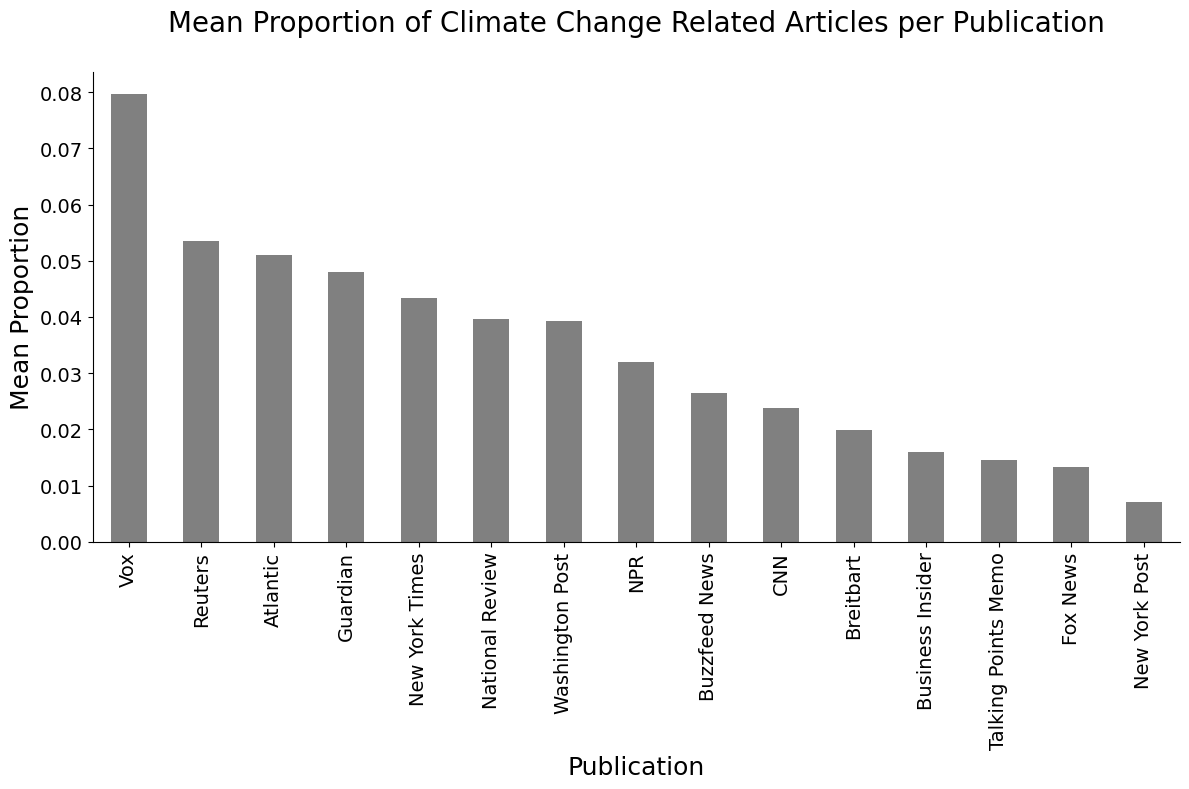

In [77]:
proportions = art_grps['cc_wds'].sum() / art_grps['cc_wds'].count()
proportions.sort_values(ascending=True)

ax=proportions.sort_values(ascending=False).plot(kind='bar', fontsize=14, figsize=(12,8), color="gray")
ax.set_title('Mean Proportion of Climate Change Related Articles per Publication\n', fontsize=20)
ax.set_ylabel('Mean Proportion', fontsize=18)
ax.set_xlabel('Publication', fontsize=18)
plt.tight_layout()
sns.despine();

# 🧑🏿‍🤝‍🧑🏿 Is a certain political group more prominent

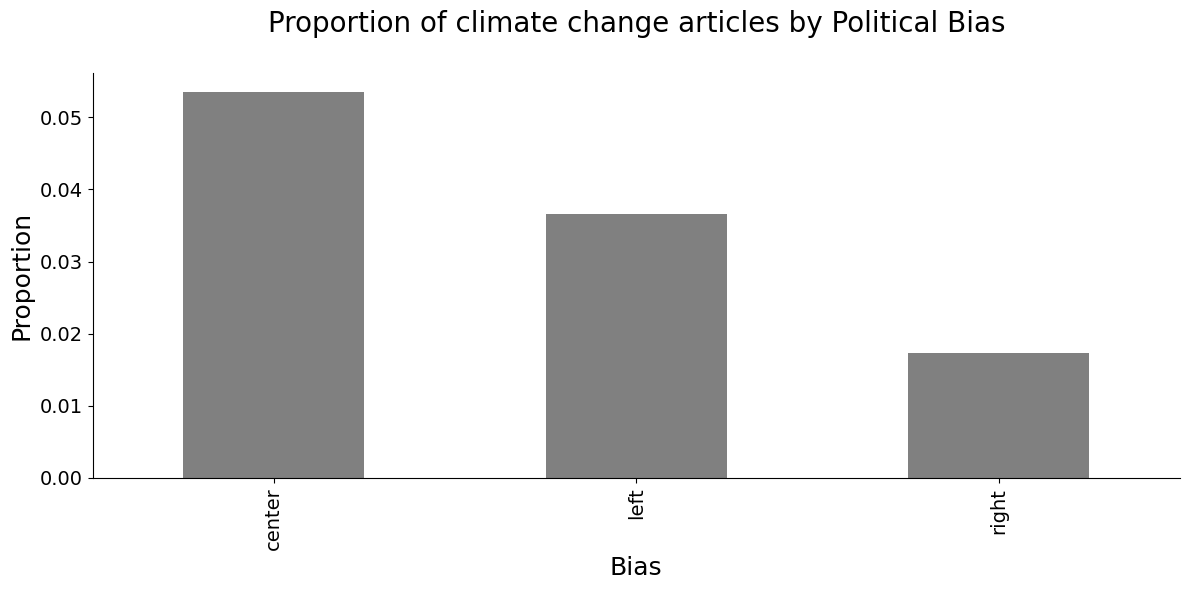

In [79]:
# The assignment of publications to bias slant is somewhat subjective
#liberal, conservative, and center
bias_assigns = {'Atlantic': 'left', 'Breitbart': 'right', 'Business Insider': 'left', 'Buzzfeed News': 'left', 'CNN': 'left', 'Fox News': 'right',
                'Guardian': 'left', 'National Review': 'right', 'New York Post': 'right', 'New York Times': 'left',
                'NPR': 'left', 'Reuters': 'center', 'Talking Points Memo': 'left', 'Washington Post': 'left', 'Vox': 'left'}
articles['bias'] = articles['publication'].apply(lambda x: bias_assigns[x])
# of course assignment of bias is subjective - you should mention that in your analysis

bias_groups = articles.groupby('bias')
bias_proportions = bias_groups['cc_wds'].sum() / bias_groups['cc_wds'].count()

ax=bias_proportions.plot(kind='bar', fontsize=14, figsize=(12,6), color="gray")
ax.set_title('Proportion of climate change articles by Political Bias\n', fontsize=20)
ax.set_xlabel('Bias', fontsize=18)
ax.set_ylabel('Proportion', fontsize=18)
plt.tight_layout()
sns.despine();

In [80]:
def standard_err(p1, n1, p2, n2):
    return np.sqrt((p1* (1-p1) / n1) + (p2 * (1-p2) / n2))

def ci_range(diff, std_err, cv=1.96):
    return (diff - cv * std_err, diff + cv * std_err)

def calc_ci_range(p1, n1, p2, n2):
    std_err = standard_err(p1, n1, p2, n2)
    diff = p1-p2
    return ci_range(diff, std_err)

center = bias_groups.get_group('center')
left = bias_groups.get_group('left')
right = bias_groups.get_group('right')

# Confidence interval is 
_ = np.round(calc_ci_range(bias_proportions['left'], len(left), bias_proportions['right'], len(right)), 3)*100
print(f"left vs. right: \t {_[0]}% to {_[1]}%")

_ = np.round(calc_ci_range(bias_proportions['center'], len(center), bias_proportions['left'], len(left)), 3)*100
print(f"center vs. left: \t {_[0]}% to {_[1]}%")

_ = np.round(calc_ci_range(bias_proportions['center'], len(center), bias_proportions['right'], len(right)), 3)*100
print(f"center vs. right: \t {_[0]}% to {_[1]}%")

left vs. right: 	 1.7000000000000002% to 2.1%
center vs. left: 	 1.3% to 2.1%
center vs. right: 	 3.2% to 4.1000000000000005%


Next, we can look at publication ownership, using the same approach. We divide our population into four groups, LLC, corporation, non-profit, and private.

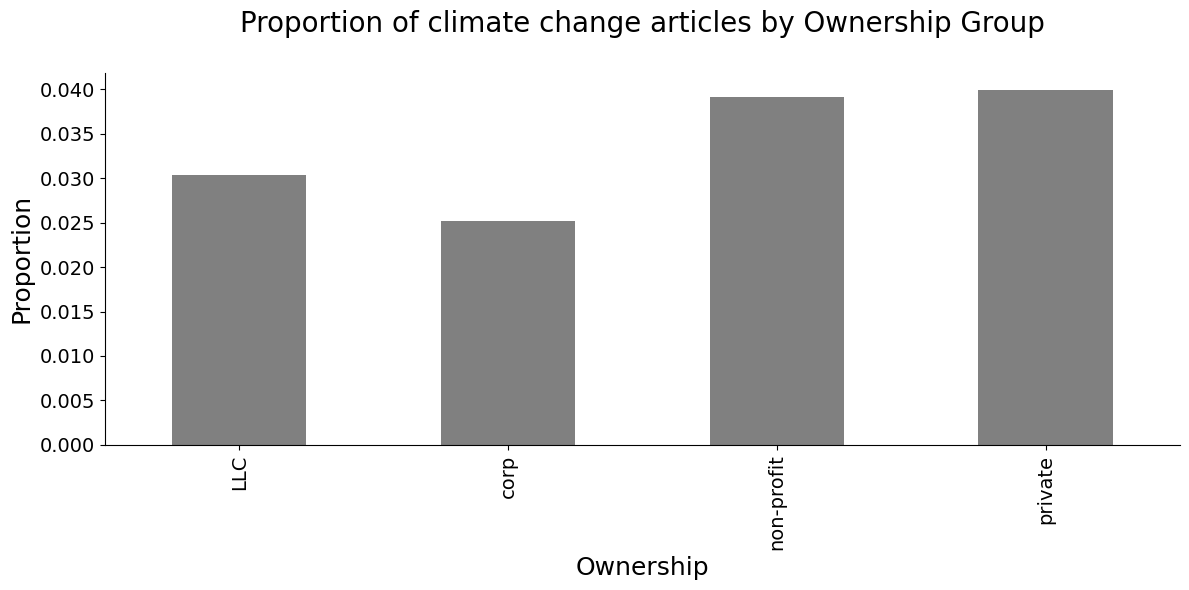

In [81]:
# we create a dictionary with ownership groups
own_assigns = {'Atlantic': 'non-profit', 'Breitbart': 'LLC', 'Business Insider': 'corp', 'Buzzfeed News': 'private',
               'CNN': 'corp', 'Fox News': 'corp',
                'Guardian': 'LLC', 'National Review': 'non-profit', 'New York Post': 'corp', 'New York Times': 'corp',
                'NPR': 'non-profit', 'Reuters': 'corp', 'Talking Points Memo': 'private', 'Washington Post': 'LLC', 'Vox': 'private'}
articles['ownership'] = articles['publication'].apply(lambda x: own_assigns[x])
owner_groups = articles.groupby('ownership')
owner_proportions = owner_groups['cc_wds'].sum() / owner_groups['cc_wds'].count()

ax=owner_proportions.plot(kind='bar', fontsize=14, figsize=(12,6), color="gray")
ax.set_title('Proportion of climate change articles by Ownership Group\n', fontsize=20)
ax.set_xlabel('Ownership', fontsize=18)
ax.set_ylabel('Proportion', fontsize=18)
plt.tight_layout()
sns.despine();

In [82]:
llc = owner_groups.get_group('LLC')
corp = owner_groups.get_group('corp')
non_profit = owner_groups.get_group('non-profit')
private = owner_groups.get_group('private')


_ = np.round(calc_ci_range(owner_proportions['LLC'], len(llc), owner_proportions['corp'], len(corp)), 3)*100
print(f"LLC vs. corp: \t\t\t {_[0]}% to {_[1]}%")

_ = np.round(calc_ci_range(owner_proportions['non-profit'], len(non_profit), owner_proportions['LLC'], len(llc)), 3)*100
print(f"non-profit vs. LLC \t\t {_[0]}% to {_[1]}%")

_ = np.round(calc_ci_range(owner_proportions['private'], len(private), owner_proportions['non-profit'], len(non_profit)), 3)*100
print(f"private vs. non-profit: \t {_[0]}% to {_[1]}%, (not significant)")

LLC vs. corp: 			 0.3% to 0.7000000000000001%
non-profit vs. LLC 		 0.6% to 1.2%
private vs. non-profit: 	 -0.3% to 0.5%, (not significant)


# Nicer Plots with PLOTLY

In [ ]:
# https://plotly.com/python/bar-charts/
# if you do not have plotly you can install via conda enviroments just place checkmark to plotly

In [83]:
pub_count = articles['publication'].value_counts().to_frame()
pub_count

,count
publication,
Breitbart,23781
New York Post,17493
NPR,11992
CNN,11485
Washington Post,11114
Reuters,10710
Guardian,8680
New York Times,7803
Atlantic,7178


In [112]:
type(pub_count)

pandas.core.frame.DataFrame

In [84]:
# if plotly does not exist
# install with pip
# pip install plotly
import plotly.express as px

In [86]:
# type of pub_count
pub_count.head()

,count
publication,
Breitbart,23781
New York Post,17493
NPR,11992
CNN,11485
Washington Post,11114


In [87]:
fig = px.bar(pub_count, x=pub_count.index, y="count", title="Article Count by Publication")
fig.show()

## Conclusions

- Breitbart leads the pack in terms of number of articles
- The average length of articles is around 1000 words
- The average number of unique words is around 500 words - verifying that the articles are not just copy-pasted
- Vox and Business Insider are the most verbose
- Most importantly climate change articles are more represented in the dataset in left-leaning publications - not a big surprise, our hypothesis was correct

## Some learning references

- [Text Analysis in Python](https://www.dataquest.io/blog/tutorial-text-analysis-python-test-hypothesis/)
- [Pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
- [Regex Cheat Sheet](https://www.dataquest.io/blog/regex-cheatsheet/)
- [Plotly](https://plotly.com/python/)
- [Matplotlib](https://matplotlib.org/stable/contents.html)